### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [9]:
data.info

<bound method DataFrame.info of            destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  

In [11]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

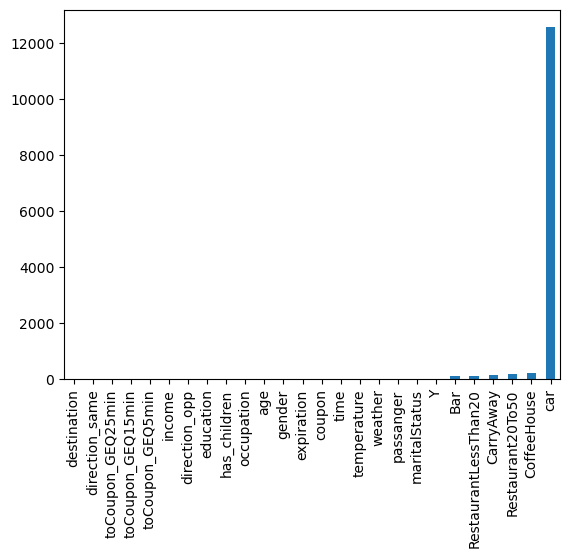

In [8]:
ax=data.isnull().sum().sort_values().plot(kind = 'bar')
ax.figure.savefig('results5.1/missing_plot_.png')


In [56]:
dunique = data.groupby(['Bar'], dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={"Bar": "Value"})
dunique.insert(0, 'Column', 'Bar')
dunique

,Column,Value,Count
0,Bar,1~3,2473
1,Bar,4~8,1076
2,Bar,gt8,349
3,Bar,less1,3482
4,Bar,never,5197
5,Bar,NaN,107


In [76]:
i = 'Bar'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
dunique = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={i: "Value"})
dunique.insert(0, 'Column',i)
dunique

Current  List ['Bar']


,Column,Value,Count
0,Bar,1~3,2473
1,Bar,4~8,1076
2,Bar,gt8,349
3,Bar,less1,3482
4,Bar,never,5197
5,Bar,NaN,107


In [81]:
i = 'RestaurantLessThan20'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
dunique = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={i: "Value"})
dunique.insert(0, 'Column',i)
dunique

Current  List ['RestaurantLessThan20']


,Column,Value,Count
0,RestaurantLessThan20,1~3,5376
1,RestaurantLessThan20,4~8,3580
2,RestaurantLessThan20,gt8,1285
3,RestaurantLessThan20,less1,2093
4,RestaurantLessThan20,never,220
5,RestaurantLessThan20,NaN,130


In [82]:
i = 'CarryAway'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
dunique = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={i: "Value"})
dunique.insert(0, 'Column',i)
dunique

Current  List ['CarryAway']


,Column,Value,Count
0,CarryAway,1~3,4672
1,CarryAway,4~8,4258
2,CarryAway,gt8,1594
3,CarryAway,less1,1856
4,CarryAway,never,153
5,CarryAway,NaN,151


In [83]:
i = 'Restaurant20To50'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
dunique = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={i: "Value"})
dunique.insert(0, 'Column',i)
dunique

Current  List ['Restaurant20To50']


,Column,Value,Count
0,Restaurant20To50,1~3,3290
1,Restaurant20To50,4~8,728
2,Restaurant20To50,gt8,264
3,Restaurant20To50,less1,6077
4,Restaurant20To50,never,2136
5,Restaurant20To50,NaN,189


In [84]:
i = 'CoffeeHouse'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
dunique = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={i: "Value"})
dunique.insert(0, 'Column',i)
dunique

Current  List ['CoffeeHouse']


,Column,Value,Count
0,CoffeeHouse,1~3,3225
1,CoffeeHouse,4~8,1784
2,CoffeeHouse,gt8,1111
3,CoffeeHouse,less1,3385
4,CoffeeHouse,never,2962
5,CoffeeHouse,NaN,217


In [85]:
i = 'car'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
dunique = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={i: "Value"})
dunique.insert(0, 'Column',i)
dunique

Current  List ['car']


,Column,Value,Count
0,car,Car that is too old to install Onstar :D,21
1,car,Mazda5,22
2,car,Scooter and motorcycle,22
3,car,crossover,21
4,car,do not drive,22
5,car,NaN,12576


3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
# for the columns with NaN I would replace the missing value with  a specific value e.g. no answer, because dropping might lead to a wrong answer / misinterpreation
data = data.fillna({'Bar': 'no answer', 'RestaurantLessthan20': 'no answer','CarryAway': 'no answer','Restaurant20To50': 'no answer','Coffeehouse': 'no answer', 'car':'no answer'})


In [90]:
i = 'car'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
dunique = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={i: "Value"})
dunique.insert(0, 'Column',i)
dunique


Current  List ['car']


,Column,Value,Count
0,car,Car that is too old to install Onstar :D,21
1,car,Mazda5,22
2,car,Scooter and motorcycle,22
3,car,crossover,21
4,car,do not drive,22
5,car,no answer,12576


In [133]:
i = 'coupon'
j = 'Y'
group_list = []
group_list.append(i)
group_list.append(j)
print(f'Current  List {group_list}')
duniquecoupon = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
duniquecoupon['%'] = 100 * duniquecoupon['Count'] / duniquecoupon.groupby('coupon')['Count'].transform('sum')
duniquecoupon['Acceptance'] = np.where(duniquecoupon['Y'] ==  0, 'not accepted', 'accepted')
duniquecoupon

Current  List ['coupon', 'Y']


,coupon,Y,Count,%,Acceptance
0,Bar,0,1190,58.998513,not accepted
1,Bar,1,827,41.001487,accepted
2,Carry out & Take away,0,633,26.452152,not accepted
3,Carry out & Take away,1,1760,73.547848,accepted
4,Coffee House,0,2001,50.075075,not accepted
5,Coffee House,1,1995,49.924925,accepted
6,Restaurant(20-50),0,834,55.898123,not accepted
7,Restaurant(20-50),1,658,44.101877,accepted
8,Restaurant(<20),0,816,29.289304,not accepted
9,Restaurant(<20),1,1970,70.710696,accepted


4. What proportion of the total observations chose to accept the coupon? 



In [131]:
#As far as I understood, all those accepeted the coupon where Y = 1
# rows with Y= 1 ... accepted and Y=0 .. not accepeted are

i = 'Y'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
dunique = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={i: "Value"})
dunique['Desc'] = np.where(dunique['Value'] ==  0, 'not accepted', 'accepted')
dunique['%'] = 100 * dunique['Count'] / len(data.index)
dunique

# 5474 accepted the coupons and 7210 not accepted the coupons
# that means 43.16 percent accepted the coupob whereas 56.84 did not accept it

Current  List ['Y']


,Value,Count,Desc,%
0,0,5474,not accepted,43.156733
1,1,7210,accepted,56.843267


5. Use a bar plot to visualize the `coupon` column.

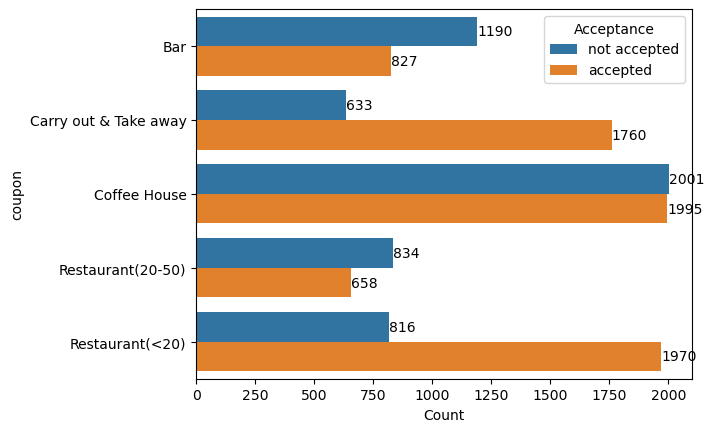

In [134]:
ax = sns.barplot(x='Count', y='coupon',
                 hue='Acceptance', data=duniquecoupon)
for i in ax.containers:
    ax.bar_label(i,)


6. Use a histogram to visualize the temperature column.

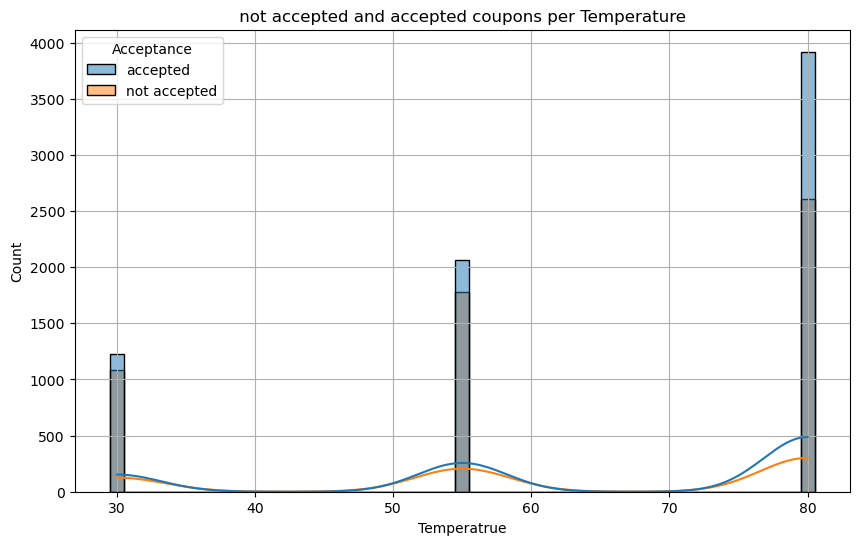

In [146]:
data['Acceptance'] = np.where(data['Y'] ==  0, 'not accepted', 'accepted')

plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = "temperature", stat = 'count',   hue = "Acceptance", discrete = True, kde=True)
plt.title(' not accepted and accepted coupons per Temperature ')
plt.xlabel('Temperatrue')
plt.ylabel('Count')
plt.grid(True)
plt.show()



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
bar_data = data.loc[(data['coupon'] == 'Bar') ]

In [17]:
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,no answer,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,no answer,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,no answer,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [19]:
#As far as I understood, all those accepeted the coupon where Y = 1
# rows with Y= 1 ... accepted and Y=0 .. not accepeted are

i = 'Y'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
barunique = bar_data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
barunique = barunique.rename(columns={i: "Value"})
barunique['Desc'] = np.where(barunique['Value'] ==  0, 'not accepted', 'accepted')
barunique['%'] = 100 * barunique['Count'] / len(bar_data.index)
barunique

# 1190 bar-coupons were accepted  and 827 were not accepted 
# that means 41 percent accepted the bar-coupons whereas 59 did not accept it

Current  List ['Y']


,Value,Count,Desc,%
0,0,1190,not accepted,58.998513
1,1,827,accepted,41.001487


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [21]:
def less_3_times(value):
    if value == "no answer":
        return -1
    elif value == "less1":
        return 1
    elif value == "never":
        return 1
    elif value == "1~3":
        return 1
    else: return 0

bar_data['Went_Less_3_Times'] = bar_data['Bar'].map(less_3_times)
display(bar_data.head())




,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Went_Less_3_Times
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,no answer,4~8,1~3,1,1,0,0,1,0,1
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,no answer,4~8,1~3,1,0,0,1,0,1,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,no answer,4~8,1~3,1,1,1,0,1,0,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,1


In [23]:
i = 'Went_Less_3_Times'
j = 'Y'
group_list = []
group_list.append(i)
group_list.append(j)
print(f'Current  List {group_list}')
baruniquecoupon = bar_data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
baruniquecoupon['%'] = 100 * baruniquecoupon['Count'] / baruniquecoupon.groupby('Went_Less_3_Times')['Count'].transform('sum')
baruniquecoupon['Acceptance'] = np.where(baruniquecoupon['Y'] ==  0, 'not accepted', 'accepted')
baruniquecoupon

# the acceptance-rate for those who went less than 3 times (Went_Less_3_Times - column = 1) is 37%
# whereas  the acceptance-rate for those who went more  3 times (Went_Less_3_Times - column = 0) is 76%

Current  List ['Went_Less_3_Times', 'Y']


,Went_Less_3_Times,Y,Count,%,Acceptance
0,-1,0,13,61.904762,not accepted
1,-1,1,8,38.095238,accepted
2,0,0,46,23.115578,not accepted
3,0,1,153,76.884422,accepted
4,1,0,1131,62.938230,not accepted
5,1,1,666,37.061770,accepted


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
bar_data['Went_More_1_Times_and_over_25'] = np.where(np.logical_or(bar_data['Bar'] == 'never', bar_data['Bar'] == 'less1', bar_data['Bar'] =='no answer') & bar_data['age'] <= 25, 0, 1)
display(bar_data.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Went_Less_3_Times,Went_More_1_Times_and_over_25
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,1,0,1,1,0
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,1,0,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,0,1,1,1,0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,1,0,1,1,0


In [37]:
i = 'Went_More_1_Times_and_over_25'
j = 'Y'
group_list = []
group_list.append(i)
group_list.append(j)
print(f'Current  List {group_list}')
baruniquecoupon = bar_data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
baruniquecoupon['%'] = 100 * baruniquecoupon['Count'] / baruniquecoupon.groupby('Went_More_1_Times_and_over_25')['Count'].transform('sum')
baruniquecoupon['Acceptance'] = np.where(baruniquecoupon['Y'] ==  0, 'not accepted', 'accepted')
baruniquecoupon




# the acceptance-rate for those who went to the bar  more than once a month and are over the age of 25 is 41%


Current  List ['Went_More_1_Times_and_over_25', 'Y']


,Went_More_1_Times_and_over_25,Y,Count,%,Acceptance
0,0,0,1190,58.998513,not accepted
1,0,1,827,41.001487,accepted


In [39]:

bar_data['Not_Went_More_1_Times_and_over_25'] = np.where(bar_data['Went_More_1_Times_and_over_25'] == 1, 0, 1)
i = 'Not_Went_More_1_Times_and_over_25'
j = 'Y'
group_list = []
group_list.append(i)
group_list.append(j)
print(f'Current  List {group_list}')
baruniquecoupon = bar_data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
baruniquecoupon['%'] = 100 * baruniquecoupon['Count'] / baruniquecoupon.groupby('Not_Went_More_1_Times_and_over_25')['Count'].transform('sum')
baruniquecoupon['Acceptance'] = np.where(baruniquecoupon['Y'] ==  0, 'not accepted', 'accepted')
baruniquecoupon

Current  List ['Not_Went_More_1_Times_and_over_25', 'Y']


,Not_Went_More_1_Times_and_over_25,Y,Count,%,Acceptance
0,1,0,1190,58.998513,not accepted
1,1,1,827,41.001487,accepted


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [41]:
i = 'passanger'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
dunique = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={i: "Value"})
dunique.insert(0, 'Column',i)
dunique

Current  List ['passanger']


,Column,Value,Count
0,passanger,Alone,7305
1,passanger,Friend(s),3298
2,passanger,Kid(s),1006
3,passanger,Partner,1075


In [49]:
i = 'occupation'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
dunique = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={i: "Value"})
dunique.insert(0, 'Column',i)
dunique

Current  List ['occupation']


,Column,Value,Count
0,occupation,Architecture & Engineering,175
1,occupation,Arts Design Entertainment Sports & Media,629
2,occupation,Building & Grounds Cleaning & Maintenance,44
3,occupation,Business & Financial,544
4,occupation,Community & Social Services,241
5,occupation,Computer & Mathematical,1408
6,occupation,Construction & Extraction,154
7,occupation,Education&Training&Library,943
8,occupation,Farming Fishing & Forestry,43
9,occupation,Food Preparation & Serving Related,298


In [99]:
bar_data['occupation2'] = bar_data['occupation'].str.replace('&','').str.replace(' ', '')
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Went_Less_3_Times,Went_More_1_Times_and_over_25,Not_Went_More_1_Times_and_over_25,Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry,occupation2
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1,0,0,1,0,1,0,1,1,Unemployed
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,0,0,1,0,1,1,0,1,1,Unemployed
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1,1,0,1,0,1,0,1,1,Unemployed
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,0,0,1,1,1,0,1,1,ArchitectureEngineering
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,0,0,1,0,1,1,0,1,1,ArchitectureEngineering


In [112]:
bar_data['Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry'] = np.where( np.logical_or(bar_data['Bar'] == 'never', bar_data['Bar'] == 'less1', bar_data['Bar'] == 'no answer') &   bar_data['occupation2'] == 'FarmingFishingForestry', 0, 1)
bar_data['Not_Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry'] = np.where(bar_data['Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry'] == 1, 0, 1)

display(bar_data.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ25min,direction_same,direction_opp,Y,Went_Less_3_Times,Went_More_1_Times_and_over_25,Not_Went_More_1_Times_and_over_25,Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry,occupation2,Not_Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0,0,1,0,1,0,1,1,Unemployed,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,0,1,0,1,1,0,1,1,Unemployed,0
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1,0,1,0,1,0,1,1,Unemployed,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,0,1,1,1,0,1,1,ArchitectureEngineering,0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,0,1,0,1,1,0,1,1,ArchitectureEngineering,0


In [116]:
i = 'Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry'
j = 'Y'
group_list = []
group_list.append(i)
group_list.append(j)
print(f'Current  List {group_list}')
baruniquecoupon = bar_data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
baruniquecoupon['%'] = 100 * baruniquecoupon['Count'] / baruniquecoupon.groupby('Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry')['Count'].transform('sum')
baruniquecoupon['Acceptance'] = np.where(baruniquecoupon['Y'] ==  0, 'not accepted', 'accepted')
baruniquecoupon

## for bar copuns for people who went _More_1_Times_and_no Kid_not_Farming_Fishing _Forestry acceptance = 41%

Current  List ['Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry', 'Y']


,Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry,Y,Count,%,Acceptance
0,1,0,1190,58.998513,not accepted
1,1,1,827,41.001487,accepted


In [118]:
i = 'Not_Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry'
j = 'Y'
group_list = []
group_list.append(i)
group_list.append(j)
print(f'Current  List {group_list}')
baruniquecoupon = bar_data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
baruniquecoupon['%'] = 100 * baruniquecoupon['Count'] / baruniquecoupon.groupby('Not_Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry')['Count'].transform('sum')
baruniquecoupon['Acceptance'] = np.where(baruniquecoupon['Y'] ==  0, 'not accepted', 'accepted')
baruniquecoupon

## for bar copuns for people who went _More_1_Times_and_no Kid_not_Farming_Fishing _Forestry acceptance = 41%

Current  List ['Not_Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry', 'Y']


,Not_Went_More_1_Times_and_noKid_not_Farming_Fishing _Forestry,Y,Count,%,Acceptance
0,0,0,1190,58.998513,not accepted
1,0,1,827,41.001487,accepted


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [120]:
i = 'maritalStatus'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
dunique = data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
dunique = dunique.rename(columns={i: "Value"})
dunique.insert(0, 'Column',i)
dunique

Current  List ['maritalStatus']


,Column,Value,Count
0,maritalStatus,Divorced,516
1,maritalStatus,Married partner,5100
2,maritalStatus,Single,4752
3,maritalStatus,Unmarried partner,2186
4,maritalStatus,Widowed,130


In [136]:
bar_data['Went_More_1_Times_and_noKid_not_widowed'] = np.where( np.logical_or(bar_data['Bar'] == 'never', bar_data['Bar'] == 'less1', bar_data['Bar'] == 'no answer') & bar_data['maritalStatus'] == 'Widowed', 0, 1)
bar_data['Not_Went_More_1_Times_and_noKid_not_widowed'] = np.where(bar_data['Went_More_1_Times_and_noKid_not_widowed'] == 1, 0, 1)

# display(bar_data.head())

i = 'Not_Went_More_1_Times_and_noKid_not_widowed'
j = 'Y'
group_list = []
group_list.append(i)
group_list.append(j)
print(f'Current  List {group_list}')
baruniquecoupon = bar_data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
baruniquecoupon['%'] = 100 * baruniquecoupon['Count'] / baruniquecoupon.groupby('Not_Went_More_1_Times_and_noKid_not_widowed')['Count'].transform('sum')
baruniquecoupon['Acceptance'] = np.where(baruniquecoupon['Y'] ==  0, 'not accepted', 'accepted')
baruniquecoupon

## for bar copuns for people who went _More_1_Times_and_no Kid_not_Farming_Fishing _Forestry acceptance = 41%

Current  List ['Not_Went_More_1_Times_and_noKid_not_widowed', 'Y']


,Not_Went_More_1_Times_and_noKid_not_widowed,Y,Count,%,Acceptance
0,0,0,1190,58.998513,not accepted
1,0,1,827,41.001487,accepted


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Based on the results above I would say, that drivers accep bar coupons are those woth no kids as passengers or went more than once to a bar.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [138]:
coffeehouse_data = data.loc[(data['coupon'] == 'Coffee House') ]

In [140]:
coffeehouse_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,no answer,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,no answer,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,no answer,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,no answer,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,no answer,4~8,1~3,1,0,0,0,1,0


In [142]:
i = 'Y'
group_list = []
group_list.append(i)
print(f'Current  List {group_list}')
coffeeunique = coffeehouse_data.groupby(group_list, dropna=False).size().to_frame(name = 'Count').reset_index()
coffeeunique = coffeeunique.rename(columns={i: "Value"})
coffeeunique['Desc'] = np.where(coffeeunique['Value'] ==  0, 'not accepted', 'accepted')
coffeeunique['%'] = 100 * coffeeunique['Count'] / len(bar_data.index)
coffeeunique
# nearl

Current  List ['Y']


,Value,Count,Desc,%
0,0,2001,not accepted,99.206743
1,1,1995,accepted,98.909271


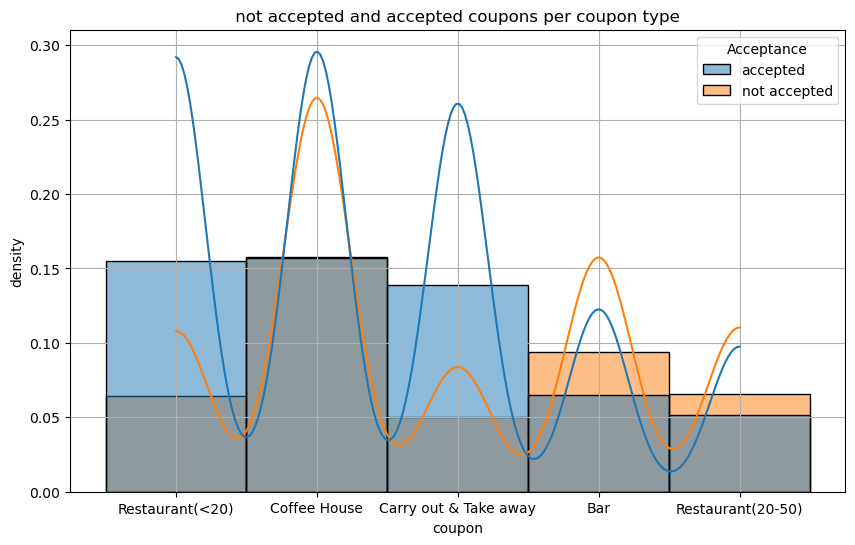

In [182]:
plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = "coupon", stat = 'density',   hue = "Acceptance", kde= 'True')
plt.title(' not accepted and accepted coupons per coupon type ')
plt.xlabel('coupon')
plt.ylabel('density')
plt.grid(True)
plt.show()


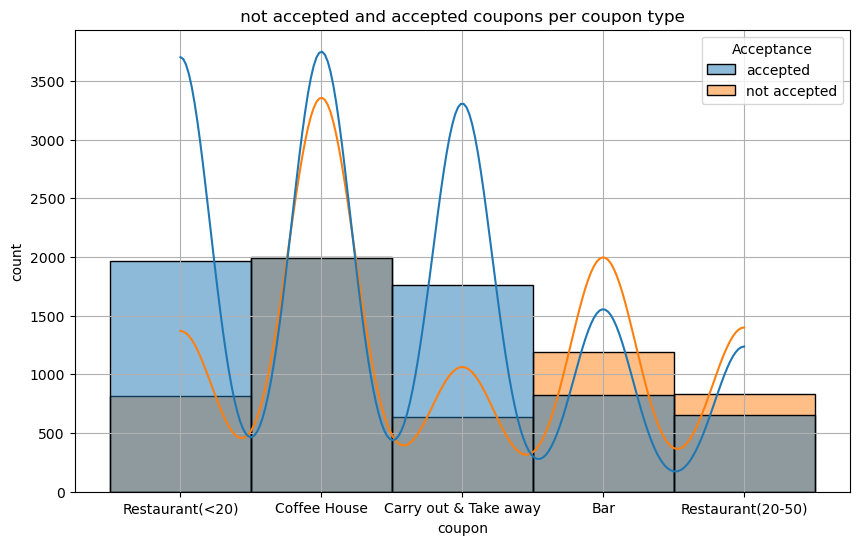

In [184]:
plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = "coupon", stat = 'count',   hue = "Acceptance", kde= 'True')
plt.title(' not accepted and accepted coupons per coupon type ')
plt.xlabel('coupon')
plt.ylabel('count')
plt.grid(True)
plt.show()


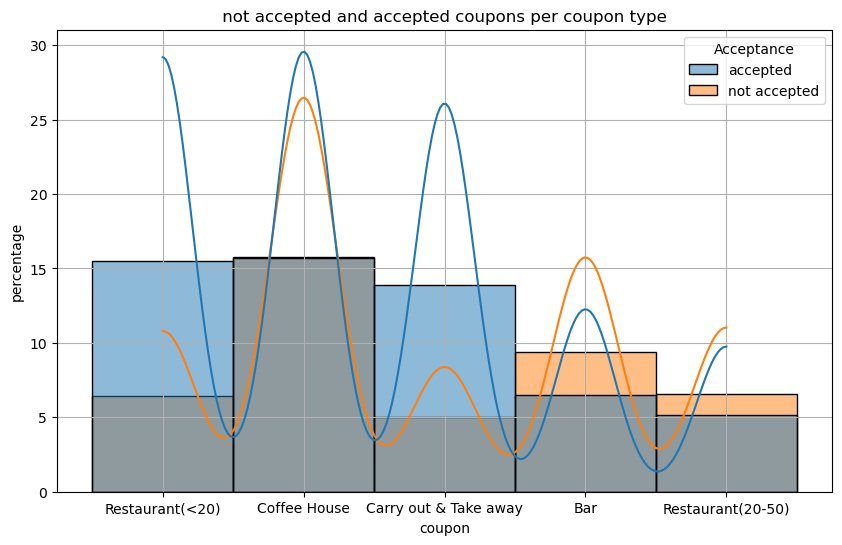

In [188]:
plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = "coupon", stat = 'percent',   hue = "Acceptance", kde= 'True')
plt.title(' not accepted and accepted coupons per coupon type ')
plt.xlabel('coupon')
plt.ylabel('percentage')
plt.grid(True)
plt.show()

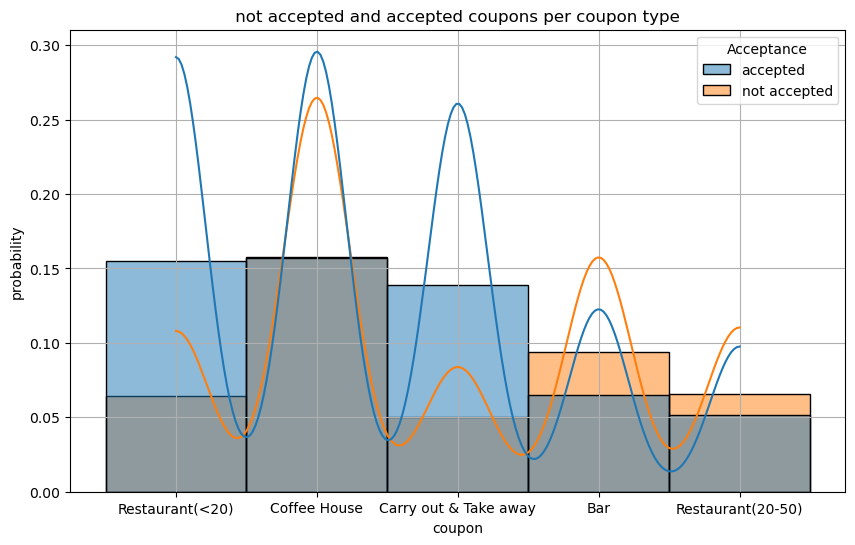

In [192]:
plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = "coupon", stat = 'probability',   hue = "Acceptance", kde= 'True')
plt.title(' not accepted and accepted coupons per coupon type ')
plt.xlabel('coupon')
plt.ylabel('probability')
plt.grid(True)
plt.show()

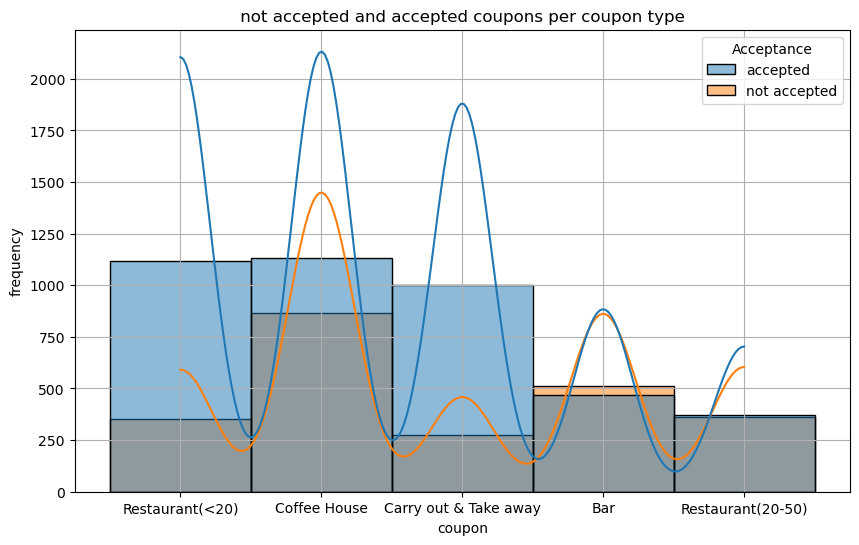

In [194]:
plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = "coupon", stat = 'frequency',   hue = "Acceptance", kde= 'True')
plt.title(' not accepted and accepted coupons per coupon type ')
plt.xlabel('coupon')
plt.ylabel('frequency')
plt.grid(True)
plt.show()